In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    print(f"User uploaded file: {filename}")
    df = pd.read_csv(filename)

df.head()




Saving DataVisualization_week2_CSV.csv to DataVisualization_week2_CSV (1).csv
User uploaded file: DataVisualization_week2_CSV (1).csv


,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date,Age
0,06/14/2023 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Faria,2001-01-12,Female,Pakistan,Nwihs,Radiology,03/11/2024 12:01:41,Started,1080,2023-06-14 12:36:09,11/03/2022 18:30:39,24
1,05/01/2023 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Poojitha,2000-08-16,Female,India,SAINT LOUIS,Information Systems,03/11/2024 12:01:41,Started,1080,2023-05-01 06:08:21,11/03/2022 18:30:39,25
2,04/09/2023 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinois Institute of Technology,Computer Science,03/11/2024 12:01:41,Started,1080,NaN,11/03/2022 18:30:39,23
3,08/29/2023 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Amrutha Varshini,1999-11-01,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:01:41,Team Allocated,1070,2023-10-09 22:02:42,11/03/2022 18:30:39,26
4,01/06/2023 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Vinay Varshith,2000-04-19,Male,United States,Saint Louis University,Computer Science,03/11/2024 12:01:41,Started,1080,2023-01-06 15:40:10,11/03/2022 18:30:39,25


In [ ]:
date_columns = [
    "Learner SignUp DateTime",
    "Opportunity End Date",
    "Date of Birth",
    "Apply Date",
    "Opportunity Start Date",
    "Entry created at"
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors="coerce")


missing_values = df.isnull().sum()

missing_values[missing_values > 0]

,0
Learner SignUp DateTime,295
Opportunity End Date,1262
Institution Name,1
Current/Intended Major,5
Apply Date,307
Opportunity Start Date,4637


In [ ]:

df["Institution Name"].fillna("Unknown", inplace=True)
df["Current/Intended Major"].fillna("Unknown", inplace=True)


df["Apply Date"].fillna(df["Apply Date"].median(), inplace=True)


df.dropna(subset=["Learner SignUp DateTime"], inplace=True)


df["Days Between Signup and Apply"] = (df["Apply Date"] - df["Learner SignUp DateTime"]).dt.days


df.isnull().sum()

<ipython-input-7-aa29b0780d06>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Institution Name"].fillna("Unknown", inplace=True)
<ipython-input-7-aa29b0780d06>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
Learner SignUp DateTime,0
Opportunity Id,0
Opportunity Name,0
Opportunity Category,0
Opportunity End Date,1215
First Name,0
Date of Birth,0
Gender,0
Country,0
Institution Name,0


In [ ]:

categorical_cols = ["Gender", "Country", "Institution Name", "Current/Intended Major", "Opportunity Category"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


df["Status Description"] = LabelEncoder().fit_transform(df["Status Description"])


X = df[["Gender", "Country", "Institution Name", "Current/Intended Major", "Opportunity Category",
        "Age", "Days Between Signup and Apply"]]
y = df["Status Description"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6610, 7), (1653, 7), (6610,), (1653,))

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_preds)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

rf_report = classification_report(y_test, rf_preds)
xgb_report = classification_report(y_test, xgb_preds)

print(f"Random Forest Accuracy: {rf_accuracy:.1%} ")
print(f"XGBoost Accuracy: {xgb_accuracy:.1%} ")

print("\nRandom Forest Classification Report:\n", rf_report)
print("\nXGBoost Classification Report:\n", xgb_report)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy: 71.3% ✅
XGBoost Accuracy: 70.9% ✅

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.09        21
           1       0.37      0.20      0.26       119
           2       0.76      0.90      0.83       689
           3       1.00      0.33      0.50         6
           4       0.68      0.71      0.69       150
           5       0.70      0.67      0.68       632
           6       0.00      0.00      0.00        19
           7       0.60      0.18      0.27        17

    accuracy                           0.71      1653
   macro avg       0.64      0.38      0.42      1653
weighted avg       0.70      0.71      0.69      1653


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.05      0.08        21
           1       0.47      0.13      0.21       119
           2       0.71      0.93      0.81       689
  

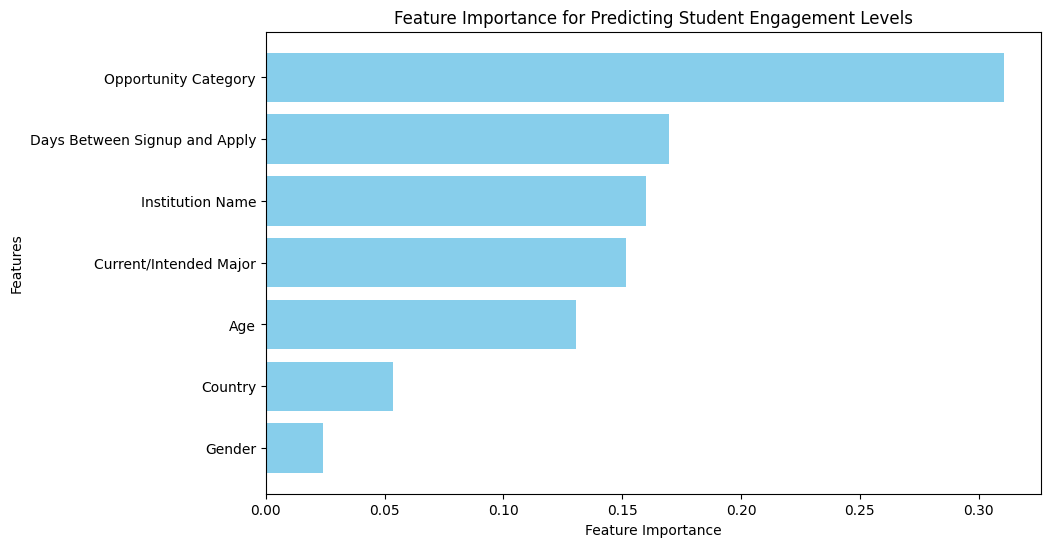

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

feature_importance = rf_model.feature_importances_
features = X.columns

sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], feature_importance[sorted_idx], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Predicting Student Engagement Levels")
plt.show()




In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=500, random_state=42)
logreg_model.fit(X_train, y_train)
logreg_preds = logreg_model.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_report = classification_report(y_test, logreg_preds)

print(f"Logistic Regression Accuracy: {logreg_accuracy:.1%} ")
print("\n Logistic Regression Classification Report:\n", logreg_report )

Logistic Regression Accuracy: 63.2% 

 Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00       119
           2       0.63      0.97      0.76       689
           3       0.00      0.00      0.00         6
           4       0.50      0.09      0.16       150
           5       0.64      0.57      0.60       632
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        17

    accuracy                           0.63      1653
   macro avg       0.22      0.20      0.19      1653
weighted avg       0.55      0.63      0.56      1653



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre